# Faire des clusters
Regardons maintenant l'intérêt de l'ACP dans le cas d'un jeu de données corrspondant à des clusters.
Nous allons, à l'aide de la cellule suivante, créer des Nc clusters en dimension D à l'intérieur d'un cube de dimension 2L.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Au travail 
1. Recentrer les données
2. En utilisant la fonction np.linalg.svd, calculer la décomposition SVD du jeu de données.
3. Combien de dimension sont utiles d'après les valeurs propres obtenues ?
3. Projeter les données sur les directions propres de la matrice de covariance obtenu par la SVD.
4. Afficher sur un scatter plot les données projeter sur les premières directions propres
5. Que se passe-t-il si vous projeter vos données sur ''trop'' de directions propres ? (observer le à l'aide d'un scatter plot)

In [4]:
D=10 # dim des données
M=5000 # nb de données
L = 5 # taille du cube
Nc = 5 # nb de clusters

centers = np.array([])
for c in range(Nc):
    m = np.random.uniform(2*L,size=(D))-L
    centers = np.append(centers,[m])
    
centers = centers.reshape(Nc,D)
ch = [c for c in range(Nc)]
data_lab = np.random.choice(ch,size=(M))
data = np.zeros((D,M))
for i in range(Nc):
    idx = np.where(data_lab==i)
    data[:,idx[0]] = centers[i,:].reshape(D,1)
    data[:,idx[0]] = centers[i].reshape(D,1) + np.random.normal(size=(D,len(idx[0])))

In [11]:
# On recentre la valeur moyenne
data = data - np.mean(data,1).reshape(D,1)

In [12]:
u,s,v = np.linalg.svd(data/np.sqrt(M))

[5.98060151 3.69222905 3.08700289 2.60902159 1.01687875 1.01133761
 1.00940433 0.99716603 0.98856148 0.97166392]


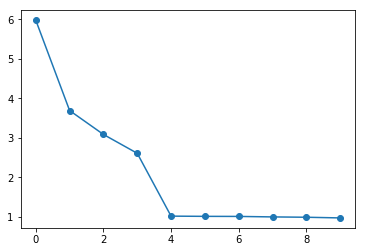

In [13]:
print(s)
plt.plot(s,'-o')

In [14]:
scatter_u = np.matmul(data.T,u)

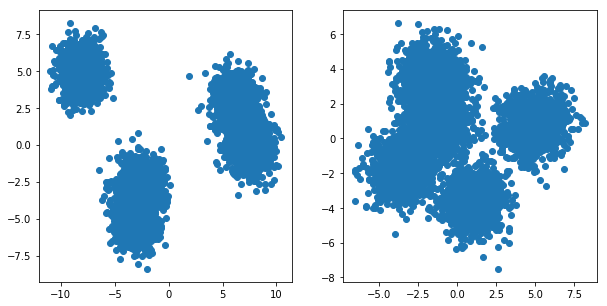

In [15]:
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(scatter_u[:,0],scatter_u[:,1])
ax[1].scatter(scatter_u[:,2],scatter_u[:,3])
plt.show()

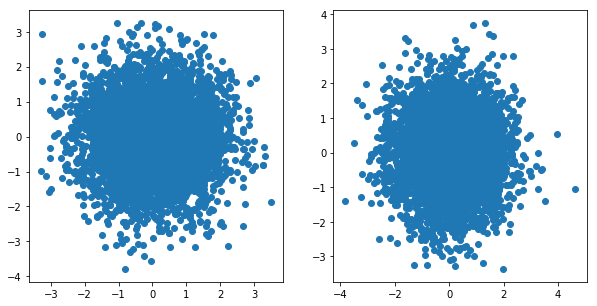

In [16]:
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(scatter_u[:,4],scatter_u[:,5])
ax[1].scatter(scatter_u[:,6],scatter_u[:,7])
plt.show()

## Le problème des grandes dimensions

Si vous aviez regardé le jeu de données précédent sans faire une projection le long des directions propres de la matrice de covariance, vous auriez sans doute déjà observé les clusters. Regardons ce qu'il se passe maintenant si on projette nos clusters en grandes dimensions.

In [18]:
# On définit une procédure de GramSchmidt
def gramschmidt(A):
    """
    Applies the Gram-Schmidt method to A
    and returns Q and R, so Q*R = A.
    """
    R = np.zeros((A.shape[1], A.shape[1]))
    Q = np.zeros(A.shape)
    for k in range(0, A.shape[1]):
        R[k, k] = np.sqrt(np.dot(A[:, k], A[:, k]))
        Q[:, k] = A[:, k]/R[k, k]
        for j in range(k+1, A.shape[1]):
            R[k, j] = np.dot(Q[:, k], A[:, j])
            A[:, j] = A[:, j] - R[k, j]*Q[:, k]
    return Q, R

In [19]:
HD = 1000
cols = D
rows = HD
A = np.random.rand(rows, cols)
Q, R = gramschmidt(A)
data_HD = np.matmul(data.T,Q.T).T

Le tableau data_HD contient les données projetées dans un espace de dimension 1000. Refaites les mêmes manipulations 2. à 6.

In [20]:
# On recentre la valeur moyenne
data_HD = data_HD - np.mean(data_HD,1).reshape(1000,1)

[5.98060151e+00 3.69222905e+00 3.08700289e+00 2.60902159e+00
 1.01687875e+00 1.01133761e+00 1.00940433e+00 9.97166028e-01
 9.88561479e-01 9.71663924e-01 8.62236229e-16 6.42841449e-16
 5.23174858e-16 4.96723613e-16 4.96723613e-16 4.96723613e-16
 4.96723613e-16 4.96723613e-16 4.96723613e-16 4.96723613e-16]


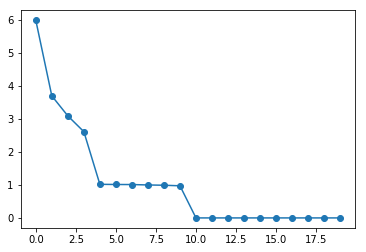

In [21]:
u,s,v = np.linalg.svd(data_HD/np.sqrt(M))
print(s[:20])
plt.plot(s[:20],'-o')

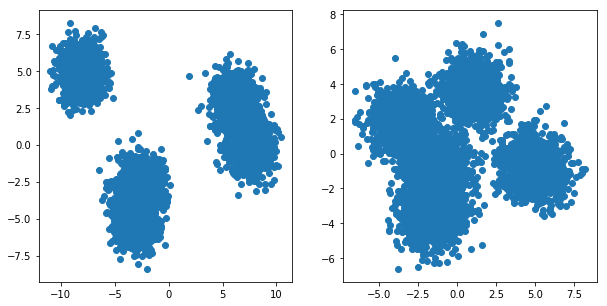

In [22]:
scatter_u = np.matmul(data_HD.T,u)
f,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].scatter(scatter_u[:,0],scatter_u[:,1])
ax[1].scatter(scatter_u[:,2],scatter_u[:,3])
plt.show()

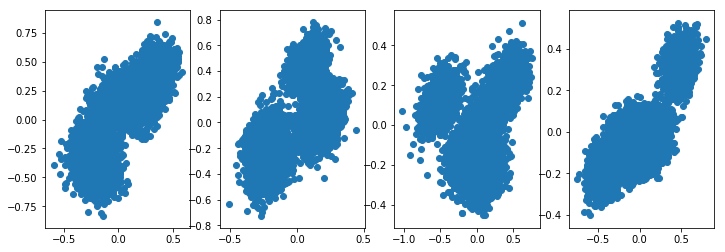

In [23]:
f,ax = plt.subplots(1,4,figsize=(12,4))
ax[0].scatter(data_HD[0,:],data_HD[1,:])
ax[1].scatter(data_HD[2,:],data_HD[3,:])
ax[2].scatter(data_HD[4,:],data_HD[5,:])
ax[3].scatter(data_HD[6,:],data_HD[7,:])
plt.show()

# ACP et Décomposition en valeurs singulières
Télécharger le fichier sur le site du cours. Utiliser le code suivant pour charger les données.

In [3]:
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

f = gzip.open('../../M1Pro-ML/mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
p = u.load()
train_set, valid_set, test_set = p

# Exploration 
Le jeu de données correspond à des images $28 \times 28$ pixels en noir et blanc. Afficher des images (regarder le premier tuple de la variable train_set) pour voir de quoi il s'agit.

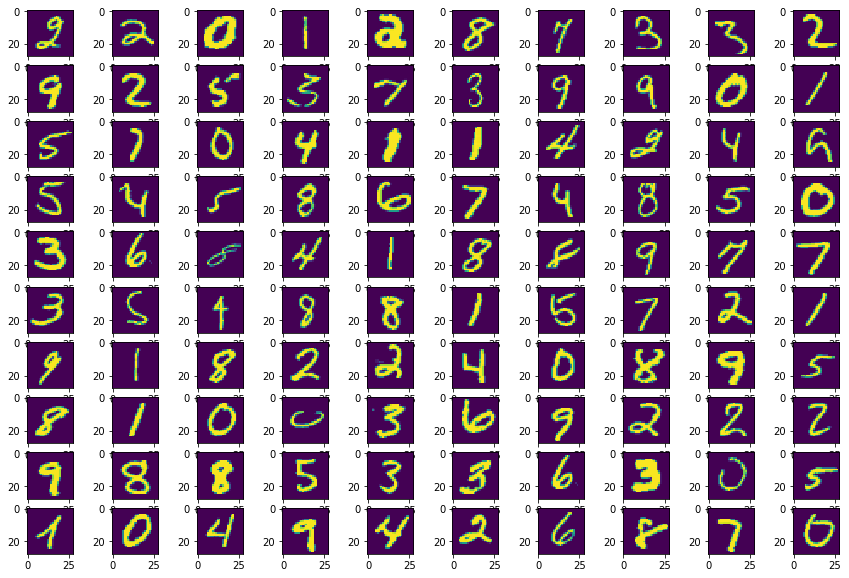

In [9]:
f,ax = plt.subplots(10,10,figsize=(15,10))
for i in range(10):
    for j in range(10):
        rdm = np.random.randint(10000)
        ax[i,j].imshow(train_set[0][rdm].reshape(28,28))

### Décomposition en valeurs singulières, visualisation et reconstruction
Vous commencerez par choisir un chiffre (parmi les 10 possibles), et allez extraire tous ceux de la classe choisis dans un nouveau tableau.

1. Effectuer la décomposition SVD du tableau pour le chiffre choisis
2. Les directions propres obtenues correspond à des images. Afficher les 20 premières directions.
3. En regardant les valeurs propres, combien de directions semblent pertinentes au problème ?
4. Maintenant, choisir une image et regarder combien de dimension il est nécessaire d'utiliser pour reconstruire correctement cette image.
5. Calculer comment varie l'erreur de reconstruction lorsque l'on fait varier le nombre de dimensions utilisées.

In [100]:
# Décomposition en SVD
digit = 3
idx_digit = np.where(train_set[1]==digit)
X = train_set[0][idx_digit].T

Xc = (X.T - np.mean(X,1)).T

u, s, v = np.linalg.svd(X/np.sqrt(X.shape[1]))
uc, sc, vc = np.linalg.svd(Xc/np.sqrt(Xc.shape[1]))

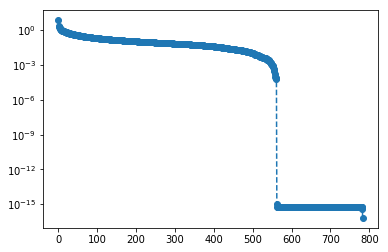

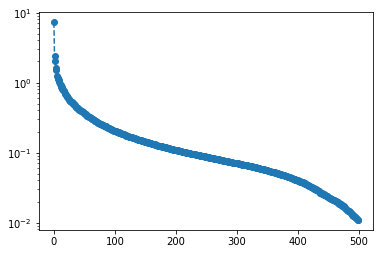

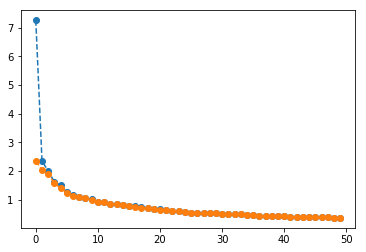

In [101]:
plt.semilogy(s,'--o')
plt.show()
plt.semilogy(s[0:500],'--o')
plt.show()
plt.plot(s[0:50],'--o')
plt.plot(sc[0:50],'--o')
plt.show()

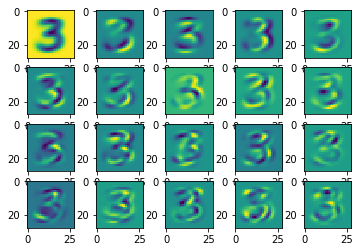

In [104]:
f,ax = plt.subplots(4,5)
idx=0
for i in range(4):
    for j in range(5):
        ax[i,j].imshow(u[:,idx].reshape(28,28))
        idx += 1
# une vp ???

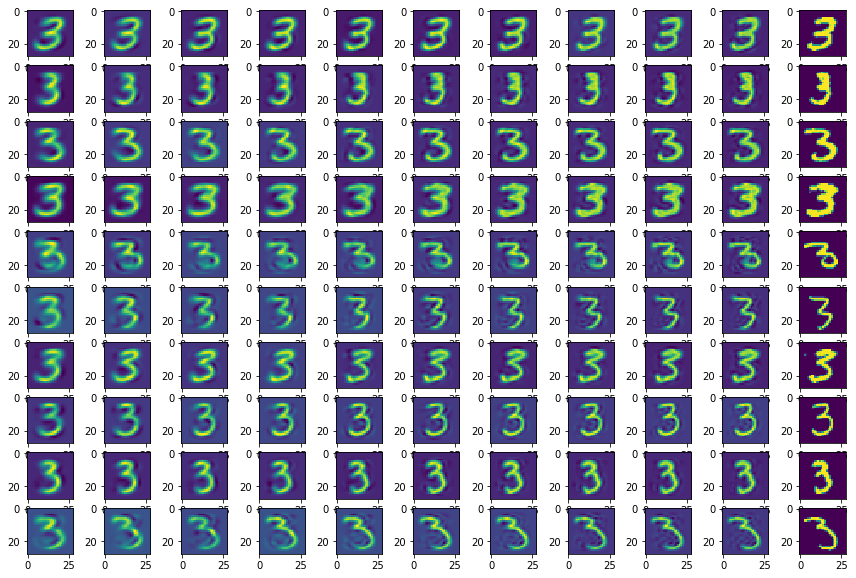

In [106]:
# Image using k vect propres
np.matmul(X[:,0].T,u[:,0])
f,ax = plt.subplots(10,11,figsize=(15,10))
for im in range(10):
    for k in range(1,11):
        proj = np.matmul(X[:,im].T,u[:,:10*k])
        im_rec = np.matmul(proj,u[:,:10*k].T)
        ax[im,k-1].imshow(im_rec.reshape(28,28))
    ax[im,10].imshow(X[:,im].reshape(28,28))

In [71]:
# On calcule l'erreur de reconstruction
im = np.random.randint(X.shape[1])
MSE = np.array([])
for k in range(1,100):
    proj = np.matmul(X[:,im].T,u[:,:k])
    im_rec = np.matmul(proj,u[:,:k].T)
    MSE = np.append(MSE,np.sqrt(np.mean(np.square(X[:,im]-im_rec))))

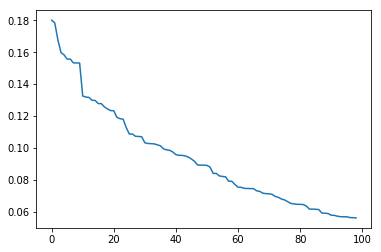

In [72]:
plt.plot(MSE)

In [84]:
# On calcule l'erreur de reconstruction (ave moyennage)
MSE = np.zeros((100))
for ns in range(100):
    im = np.random.randint(X.shape[1])
    for k in range(1,101):
        proj = np.matmul(X[:,im].T,u[:,:k])
        im_rec = np.matmul(proj,u[:,:k].T)       
        err = np.sqrt(np.mean(np.square(X[:,im]-im_rec)))
        MSE[k-1] += err

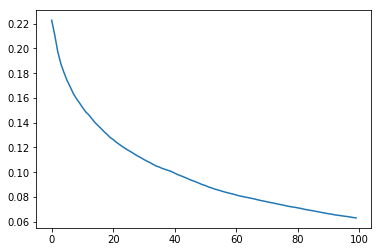

In [85]:
plt.plot(MSE/100)